Importing Necessary Packages

In [21]:
!pip install tensorflow

In [22]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import random

Loading the training and testing data (MNIST)

In [23]:
mnist = tf.keras.datasets.mnist

In [24]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

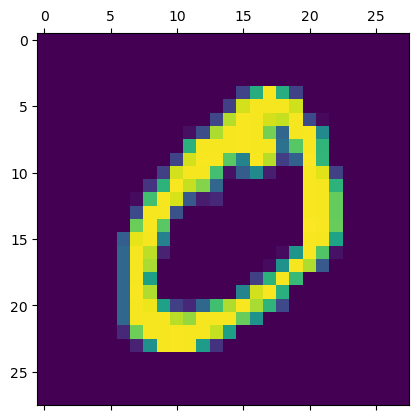

In [25]:
plt.matshow(x_train[1])

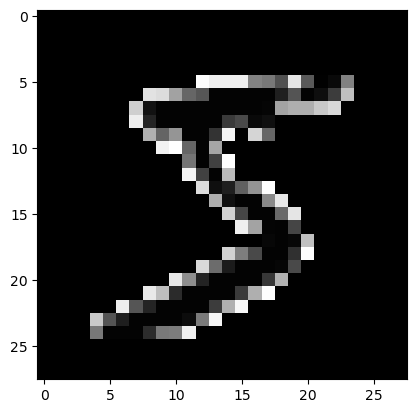

In [26]:
plt.imshow(-x_train[0],cmap="gray")

In [27]:
x_train = x_train/255
y_train = y_train/255

Define the network architecture using keras

In [28]:
model = keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),keras.layers.Dense(128,activation="relu"),keras.layers.Dense(10,activation="softmax")])

In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Train the model using SGD

In [30]:
model.compile(optimizer="sgd",loss="sparse_categorical_crossentropy",metrics=['accuracy'])

In [31]:
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0189 - accuracy: 0.0985 - val_loss: 2728.6963 - val_accuracy: 0.0980
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 7.8624e-04 - accuracy: 0.0987 - val_loss: 3014.0347 - val_accuracy: 0.0980
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 4.4783e-04 - accuracy: 0.0987 - val_loss: 3183.9851 - val_accuracy: 0.0980
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 3.1303e-04 - accuracy: 0.0987 - val_loss: 3305.6814 - val_accuracy: 0.0980
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 2.4038e-04 - accuracy: 0.0987 - val_loss: 3400.9084 - val_accuracy: 0.0980
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.9491e-04 - accuracy: 0.0987 - val_loss: 3479.2141 - val_accuracy: 0.0980
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.6379e-04 - accuracy:

Evaluate the Network

In [32]:
test_loss,test_acc=model.evaluate(x_test,y_test)

313/313 [==============================] - 0s 958us/step - loss: 3700.9329 - accuracy: 0.0980


In [33]:
print("Loss:",test_loss)
print("Accuracy:",test_acc)

Loss: 3700.932861328125
Accuracy: 0.09799999743700027


In [34]:
n=random.randint(0,9999)

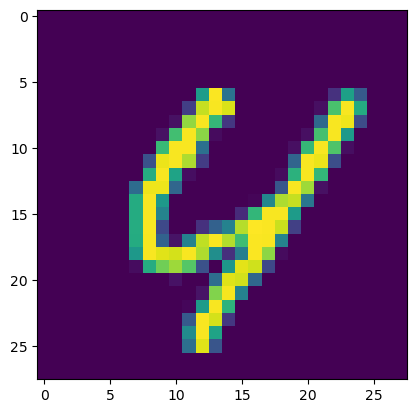

In [35]:
plt.imshow(x_test[n])
plt.show()

In [36]:
predicted_value=model.predict(x_test)

313/313 [==============================] - 0s 857us/step


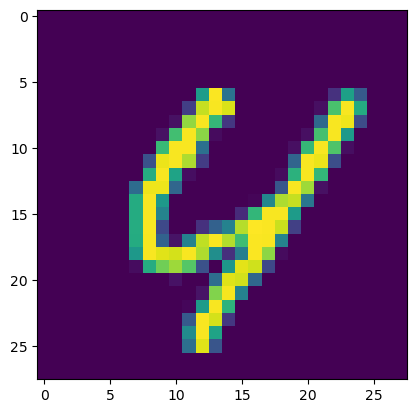

In [37]:
plt.imshow(x_test[n])
plt.show()

In [38]:
print(predicted_value[n])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


Plotting the training accuracy

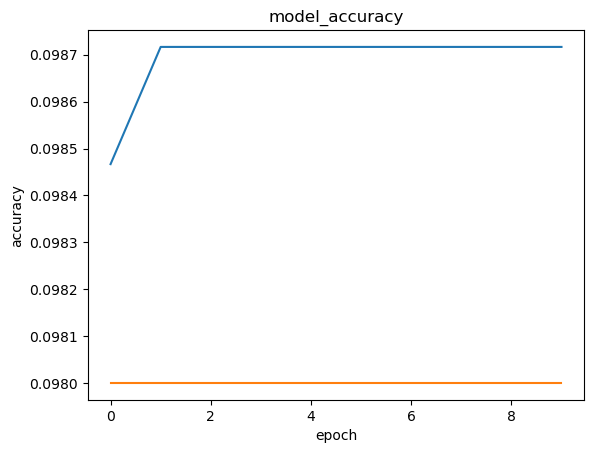

In [39]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
#plt.legend(['Train','Validation'],loc='upper left')
plt.show()

Plotting the Training Loss

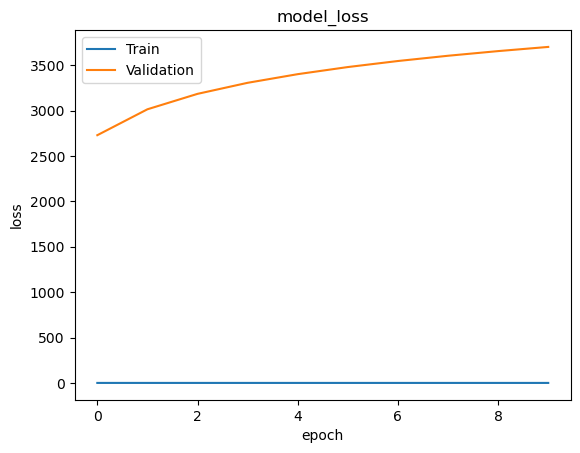

In [40]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train','Validation'],loc='upper left')
plt.show()